In [1]:
# load required libraries
import keras
import numpy as np
import matplotlib.pyplot as plt

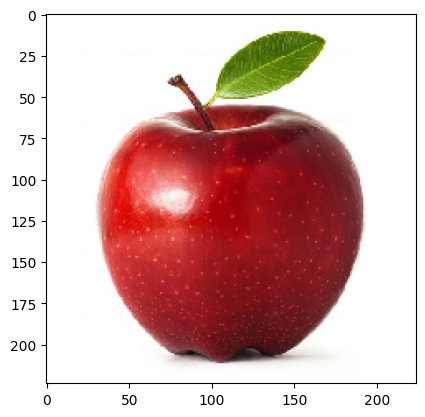

In [43]:
# load sample image file
img_file = "sample-image.jpg"
img = keras.utils.load_img(img_file, target_size=(224,224))
plt.imshow(img)

In [49]:
# convert image to numpy array
img = keras.utils.img_to_array(img)
img.shape

(224, 224, 3)

In [45]:
# build a simple CNN model
# first Conv2D layer has 20 features (neurons)
# second max-pooling layer does image abstraction

from keras import layers
inputs = keras.Input(shape=(224,224,3))
x = layers.Conv2D(20, 3, activation='relu')(inputs)
x = layers.MaxPooling2D(3)(x)

model = keras.Model(inputs, x)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 20)        │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 20)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560 (2.19 KB)

 Trainable params: 560 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# run input image through CNN
y = model.predict(np.array([img]))
y.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


(1, 74, 74, 20)

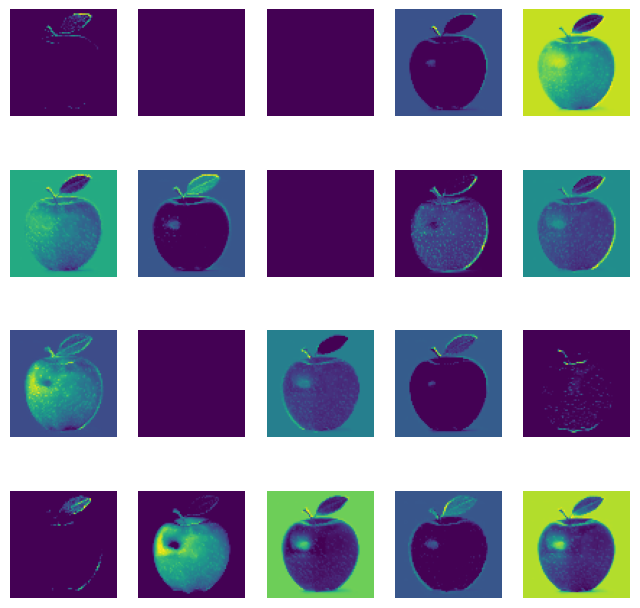

In [47]:
# visualize feature maps

plt.figure(figsize=(8,8))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.axis('off')
  plt.imshow(y[0,:,:,i])